<a href="https://colab.research.google.com/github/Nfsu26/utkarshraj/blob/main/audiodvt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing Lib
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [ ]:
sample_rate, audio_data = wavfile.read('/content/audiof11.wav') #load the audio data
display(song)

print("Audio Data :: {}". format(audio_data)) #
print("Sample Data :: {}". format(sample_rate))
print("Length of Data :: {}". format(len(audio_data)))


<ipython-input-42-9d436b2e4b8e>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read('/content/audiof11.wav')


Audio Data :: [0 0 0 ... 0 0 0]
Sample Data :: 48000
Length of Data :: 169769


In [ ]:
time = np.arange(0, len(audio_data)/ sample_rate, 1/sample_rate)
print("time :: {}". format(time))
# generates a time array that starts from 0, ends at the duration of the audio data, and has evenly spaced time points corresponding to each sample in the audio data, based on the provided sample_rate.

time :: [0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 3.53679167e+00
 3.53681250e+00 3.53683333e+00]


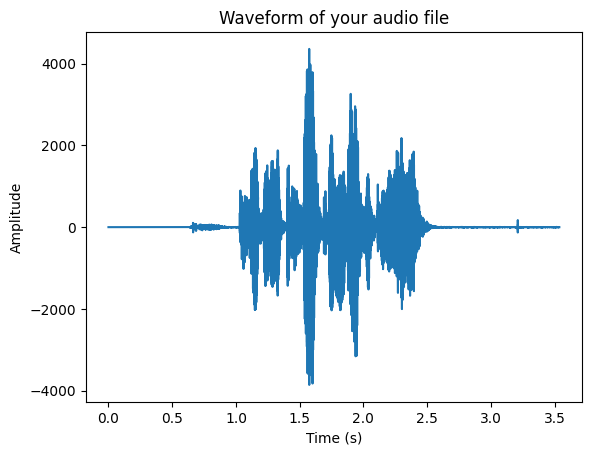

In [ ]:

# Plot waveform
plt.plot(time, audio_data)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform of your audio file")
plt.show()

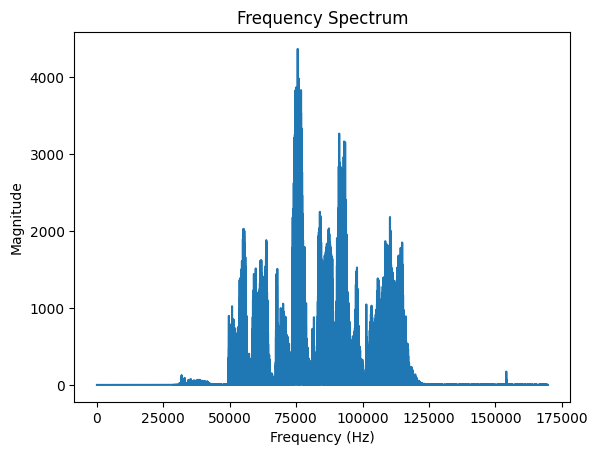

In [ ]:
from scipy.fftpack import fft


# Calculate frequency spectrum
fft_signal = fft(signal)

# Calculate the frequency spectrum
frequency_spectrum = np.abs(audio_data)

frequencies = np.linspace(0, sample_rate / 2, len(frequency_spectrum) // 2)

# Plot the frequency spectrum
plt.plot(frequency_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.show()

In [ ]:
import librosa
zero_crossings = librosa.zero_crossings(audio_data, pad=False)
zero_crossings.shape
print(sum(zero_crossings))

13190


<ipython-input-90-58d04b02038d>:8: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='gouraud')


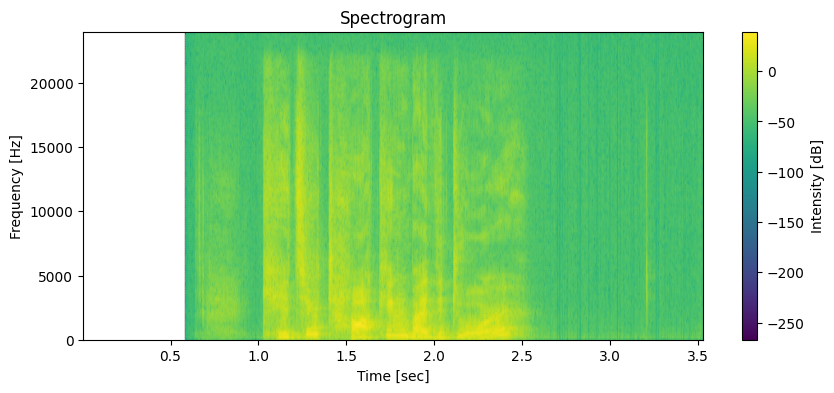

In [ ]:
from scipy.signal import spectrogram

# Create the spectrogram
frequencies, times, spectrogram_data = spectrogram(audio_data, fs=sample_rate)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')
plt.colorbar(label='Intensity [dB]')
plt.show()

#There's a peak in strength or loudness between the times 0.26 and 1.23. This peak suggests that during this portion, there's likely voice or sound present that is particularly strong or loud compared to other parts of the audio. This could indicate speech, singing, or any other sound source with significant volume.


conclusion: There's a peak in strength or loudness between the times 1.0 and 2.5. This peak suggests that during this portion, there's likely voice or sound present that is particularly strong or loud compared to other parts of the audio. This could indicate speech, singing, or any other sound source with significant volume.

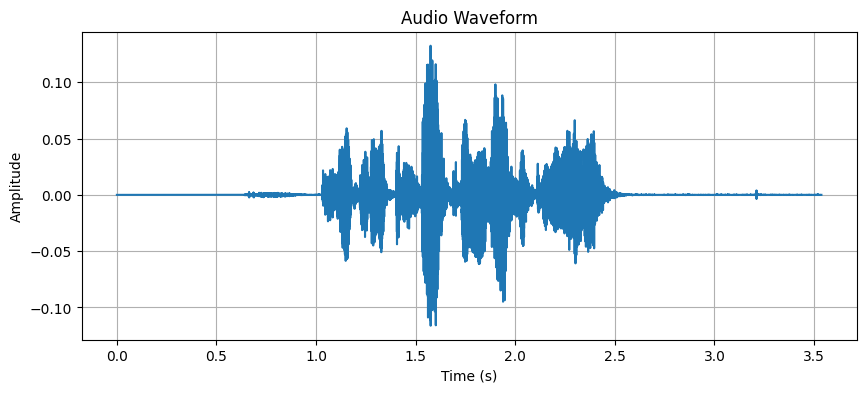

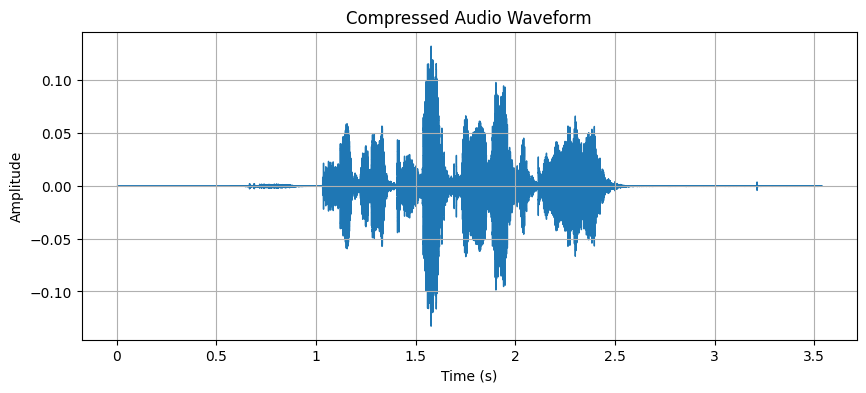

In [ ]:
import librosa.display

audio_data, sample_rate = librosa.load('/content/audiof11.wav')

def Dynamic_Range_Compression(y, thres = .2, ratio = .5):

  mask = np.abs(y) > thres
  comp_audio = np.copy(y)
  comp_audio[mask] = comp_audio[mask] - (comp_audio[mask] - thres) * ratio
  return comp_audio

# Apply dynamic range compression (example: compression ratio of 3)
compressed_audio = Dynamic_Range_Compression(audio_data)

# Plot originl wave
time_arr = np.arange(0, len(audio_data) / float(sample_rate), 1/sample_rate)

plt.figure(figsize=(10, 4))
plt.plot(time_arr, audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.grid(True)
plt.show()

# Plot the waveform of the compressed audio
plt.figure(figsize=(10, 4))
librosa.display.waveshow(compressed_audio, sr=sample_rate)
plt.title('Compressed Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

conclusion: hen an amplitude exceeds a certain threshold, in this case, 0.2, compression is applied to reduce the dynamic range. This involves reducing the difference in amplitude by 90% for amplitudes greater than 0.2. This compression technique helps control peaks in the audio signal, making the overall sound more consistent and balanced.


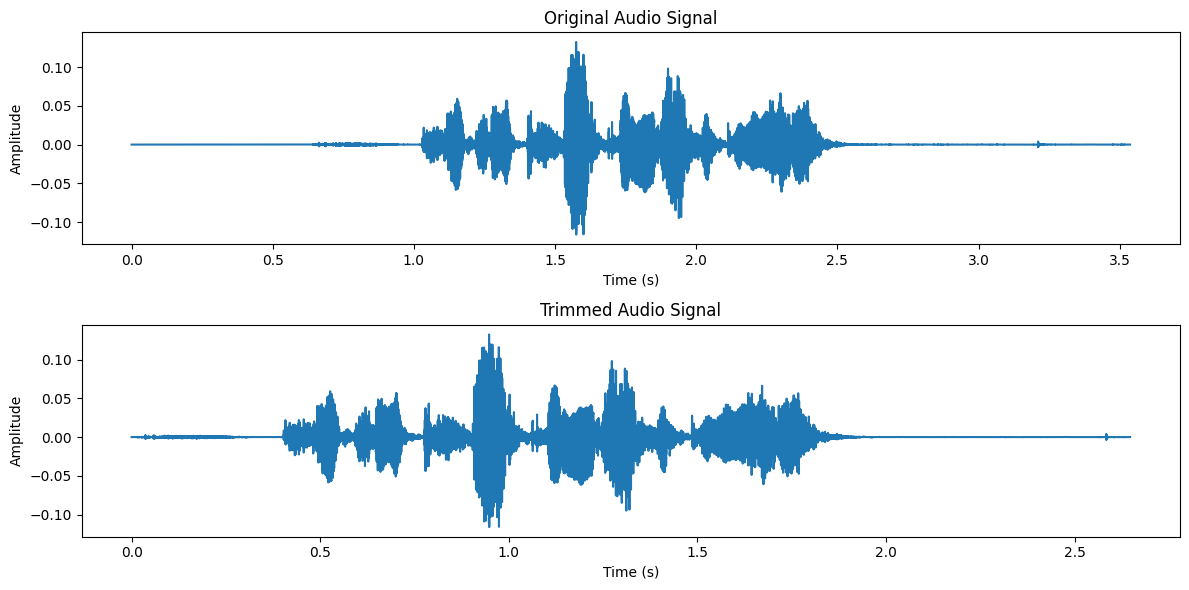

In [ ]:
# Trim leading and trailing silence
trimmed_audio, _ = librosa.effects.trim(audio_data)

# Plot the original and trimmed audio signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(audio_data)) / float(sample_rate), audio_data)
plt.title('Original Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(trimmed_audio)) / float(sample_rate), trimmed_audio)
plt.title('Trimmed Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

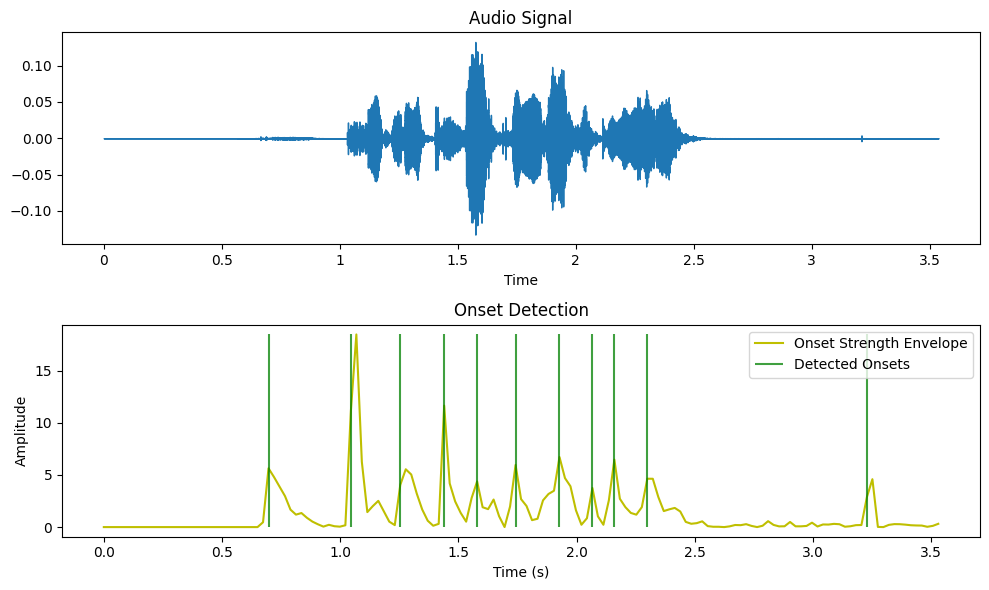

In [ ]:
# Compute the onset strength envelope
onset_env = librosa.onset.onset_strength(y=audio_data, sr=sample_rate)

# Find the onsets
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sample_rate)

# Convert frame indices to time
onset_times = librosa.frames_to_time(onset_frames, sr=sample_rate)

# Plot the audio signal and the onset envelope
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio_data, sr=sample_rate)
plt.title('Audio Signal')

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(onset_env)) * librosa.frames_to_time(1), onset_env, label='Onset Strength Envelope', color='y')
plt.vlines(onset_times, 0, onset_env.max(), color='g', alpha=0.75, label='Detected Onsets')
plt.title('Onset Detection')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

conclusion:  Onset Detection: The onset strength envelope (OSE) is a representation used in audio signal processing to capture the abrupt changes or "onsets" in a sound signal. It quantifies the magnitude of sudden changes in the audio signal over time. It's commonly used in tasks such as music information retrieval, audio segmentation, and beat tracking. Essentially, it helps to identify the points in time where significant changes in the audio signal occur, which can be useful in various audio analysis and processing applications.